(0.0, 8.0)

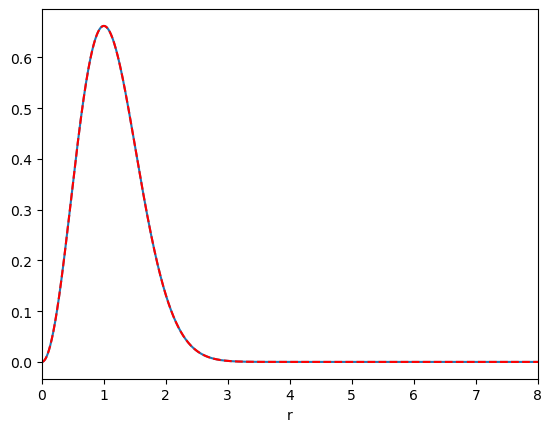

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 30                                           # Truncation ordem

L0 = 3                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      


colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()

# Base Matrix (Tchebyshev Polinomials TB_2n):

# Grid 1 (CGL):

TB = np.zeros([N+4,N+1])
rTB = np.zeros([N+4,N+1])
rrTB = np.zeros([N+4,N+1])

for i in range(N+4):                                    # TB[:,0] = function in origin
  TB[i,] = np.cos((2*i)*np.arctan(L0/r)) 

for i in range(N+4):                                    # TB[:,0] = function in origin
  rTB[i,] = 2*np.sin(2*i*np.arctan(L0/r))*i*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+4):   
  rrTB[i,] = -4*np.cos(2*i*np.arctan(L0/r))*i**2*L0**2/(r**4*(1+L0**2/r**2)**2)-4*np.sin(2*i*np.arctan(L0/r))*i*L0/(r**3*(1+L0**2/r**2))+4*np.sin(2*i*np.arctan(L0/r))*i*L0**3/(r**5*(1+L0**2/r**2)**2)

# Grid 2 (CG):

TB_2 = np.zeros([N+4,N+1])
rTB_2 = np.zeros([N+4,N+1])
rrTB_2 = np.zeros([N+4,N+1])

for i in range(N+4):                                    # TB[:,0] = function in origin
  TB_2[i,] = np.cos((2*i)*np.arctan(L0/r2)) 

for i in range(N+4):                                    # TB[:,0] = function in origin
  rTB_2[i,] = 2*np.sin(2*i*np.arctan(L0/r2))*i*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+4):   
  rrTB_2[i,] = -4*np.cos(2*i*np.arctan(L0/r2))*i**2*L0**2/(r**4*(1+L0**2/r**2)**2)-4*np.sin(2*i*np.arctan(L0/r))*i*L0/(r**3*(1+L0**2/r**2))+4*np.sin(2*i*np.arctan(L0/r))*i*L0**3/(r**5*(1+L0**2/r**2)**2)



# Base Matrix (Rational Tchebyshev Polinomials SB_2n + 1):

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)           

# Base Matrix (Rational Tchebyshev Polinomials SB_2n): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
        

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.9        # 0.9 -> Disperse;  #    0.9    -> AH      (Scalar field amplitude)

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


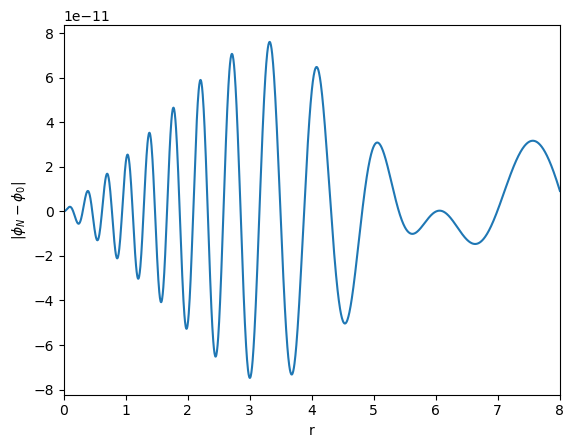

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
# Base functions of Pi:

TB1_2 = 1/2*(TB_2[2:(N+3),:] - TB_2[0:(N+1),:])         
rTB1_2 = 1/2*(rTB_2[2:(N+3),:] - rTB_2[0:(N+1),:])
rrTB1_2 = 1/2*(rrTB_2[2:(N+3),:] - rrTB_2[0:(N+1),:])


Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, TB1_2)
Pi = np.dot(b0, TB1_2)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


In [4]:
np.shape(TB1_2)

(31, 31)

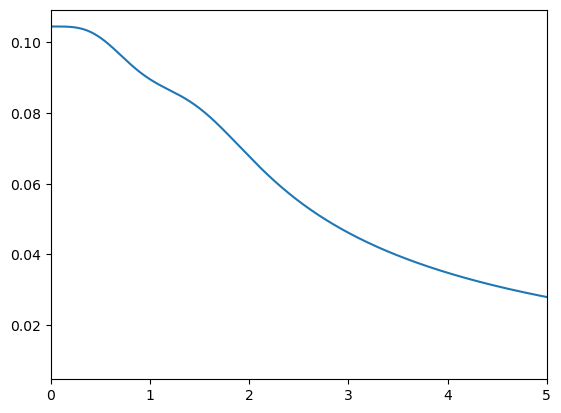

In [5]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# Grid 1: 

#SB1 = 1/2*(TB[1:(N+2),:] + TB[0:(N+1),:])          # VERIFICADO
#rSB1 = 1/2*(rTB[1:(N+2),:] + rTB[0:(N+1),:])
#rrSB1 = 1/2*(rrTB[1:(N+2),:] + rrTB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(TB_2[3:(N+4),:] - TB_2[0:(N+1),:])         
rSB1_2 = 1/2*(rTB_2[3:(N+4),:] - rTB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrTB_2[3:(N+4),:] - rrTB_2[0:(N+1),:])




# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)












In [7]:
np.shape(SB2_2)

(31, 31)

In [8]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [9]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

filter1 = np.ones(N+1)
filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [10]:
# Runge Kutta 4th order
import time

init = time.time()

h = 0.0002   # step size
tf = 8

It = int(tf/h)

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, TB1_2)   
  rPi= np.dot(b0, rTB1_2)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, psi_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1, psi)      
  rPhi = np.dot(a0 + L1, rpsi)
  rrPhi = np.dot(a0 + L1, rrpsi)

  Pi = np.dot(b0, TB1_2)   
  rPi= np.dot(b0, rTB1_2)
    
  Chi = np.dot(c0 + K1, psi) 
  rChi = np.dot(c0 + K1, rpsi)
  rrChi = np.dot(c0 + K1, rrpsi) 

  Phi_2 = np.dot(a0 + L1, psi_2)
  rPhi_2 = np.dot(a0 + L1, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1, psi_2)  
    
  Chi_2 = np.dot(c0 + K1, psi_2)
  rChi_2 = np.dot(c0 + K1, rpsi_2)  
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)

    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
    
  Pi = np.dot(b0, TB1_2)   
  rPi= np.dot(b0, rTB1_2)
    
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, psi_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)

 
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step  
  Phi = np.dot(filter1*a0 + L3, psi)     
  rPhi= np.dot(filter1*a0 + L3 , rpsi)
  rrPhi = np.dot(filter1*a0 + L3, rrpsi)
    
  Pi = np.dot(b0, TB1_2)   
  rPi= np.dot(b0, rTB1_2)
    
  Chi = np.dot(filter1*c0 + K3, psi)
  rChi = np.dot(filter1*c0 + K3, rpsi)
  rrChi = np.dot(filter1*c0 + K3, rrpsi)

  Phi_2 = np.dot(filter1*a0 + L3, psi_2)
  rPhi_2 = np.dot(filter1*a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, psi_2)  
    
  Chi_2 = np.dot(filter1*c0 + K3, psi_2)
  rChi_2 = np.dot(filter1*c0 + K3, rpsi_2)


  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi_2*rPhi_2*np.exp(4*Chi_2) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1_2)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1_2)
  
  # Alpha Grid 1  
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi_2)*Krr
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2_2)
  rBeta = np.dot(be0, rSB2_2)
    
    
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  
  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()   
    
fim = time.time()    

tex = (fim - init)/60

t1 = np.linspace(0, tf, len(Alpha_origin)) 

0.0002
0.0004
0.0006000000000000001
0.0008
0.001
0.0012000000000000001
0.0014000000000000002
0.0016000000000000003
0.0018000000000000004
0.0020000000000000005
0.0022000000000000006
0.0024000000000000007
0.0026000000000000007
0.002800000000000001
0.003000000000000001
0.003200000000000001
0.003400000000000001
0.003600000000000001
0.0038000000000000013
0.004000000000000001
0.004200000000000001
0.0044
0.0046
0.0048
0.004999999999999999
0.005199999999999999
0.0053999999999999986
0.005599999999999998
0.005799999999999998
0.0059999999999999975
0.006199999999999997
0.006399999999999997
0.0065999999999999965
0.006799999999999996
0.006999999999999996
0.0071999999999999955
0.007399999999999995
0.007599999999999995
0.0077999999999999944
0.007999999999999995
0.008199999999999995
0.008399999999999996
0.008599999999999997
0.008799999999999997
0.008999999999999998
0.009199999999999998
0.009399999999999999
0.0096
0.0098
0.01
0.0102
0.010400000000000001
0.010600000000000002
0.010800000000000002
0.011000

0.10480000000000095
0.10500000000000095
0.10520000000000096
0.10540000000000097
0.10560000000000097
0.10580000000000098
0.10600000000000098
0.10620000000000099
0.106400000000001
0.106600000000001
0.106800000000001
0.10700000000000101
0.10720000000000102
0.10740000000000102
0.10760000000000103
0.10780000000000103
0.10800000000000104
0.10820000000000105
0.10840000000000105
0.10860000000000106
0.10880000000000106
0.10900000000000107
0.10920000000000107
0.10940000000000108
0.10960000000000109
0.10980000000000109
0.1100000000000011
0.1102000000000011
0.11040000000000111
0.11060000000000111
0.11080000000000112
0.11100000000000113
0.11120000000000113
0.11140000000000114
0.11160000000000114
0.11180000000000115
0.11200000000000115
0.11220000000000116
0.11240000000000117
0.11260000000000117
0.11280000000000118
0.11300000000000118
0.11320000000000119
0.1134000000000012
0.1136000000000012
0.1138000000000012
0.11400000000000121
0.11420000000000122
0.11440000000000122
0.11460000000000123
0.114800000

0.19160000000000343
0.19180000000000344
0.19200000000000345
0.19220000000000345
0.19240000000000346
0.19260000000000346
0.19280000000000347
0.19300000000000347
0.19320000000000348
0.19340000000000349
0.1936000000000035
0.1938000000000035
0.1940000000000035
0.1942000000000035
0.19440000000000351
0.19460000000000352
0.19480000000000353
0.19500000000000353
0.19520000000000354
0.19540000000000354
0.19560000000000355
0.19580000000000355
0.19600000000000356
0.19620000000000357
0.19640000000000357
0.19660000000000358
0.19680000000000358
0.1970000000000036
0.1972000000000036
0.1974000000000036
0.1976000000000036
0.1978000000000036
0.19800000000000362
0.19820000000000362
0.19840000000000363
0.19860000000000363
0.19880000000000364
0.19900000000000365
0.19920000000000365
0.19940000000000366
0.19960000000000366
0.19980000000000367
0.20000000000000367
0.20020000000000368
0.2004000000000037
0.2006000000000037
0.2008000000000037
0.2010000000000037
0.2012000000000037
0.20140000000000371
0.201600000000

0.27860000000000196
0.27880000000000194
0.2790000000000019
0.2792000000000019
0.27940000000000187
0.27960000000000185
0.2798000000000018
0.2800000000000018
0.2802000000000018
0.28040000000000176
0.28060000000000174
0.2808000000000017
0.2810000000000017
0.28120000000000167
0.28140000000000165
0.2816000000000016
0.2818000000000016
0.2820000000000016
0.28220000000000156
0.28240000000000154
0.2826000000000015
0.2828000000000015
0.2830000000000015
0.28320000000000145
0.28340000000000143
0.2836000000000014
0.2838000000000014
0.28400000000000136
0.28420000000000134
0.2844000000000013
0.2846000000000013
0.2848000000000013
0.28500000000000125
0.28520000000000123
0.2854000000000012
0.2856000000000012
0.28580000000000116
0.28600000000000114
0.2862000000000011
0.2864000000000011
0.2866000000000011
0.28680000000000105
0.28700000000000103
0.287200000000001
0.287400000000001
0.28760000000000097
0.28780000000000094
0.2880000000000009
0.2882000000000009
0.2884000000000009
0.28860000000000086
0.28880000

0.3909999999999896
0.39119999999998956
0.39139999999998953
0.3915999999999895
0.3917999999999895
0.39199999999998947
0.39219999999998945
0.3923999999999894
0.3925999999999894
0.3927999999999894
0.39299999999998936
0.39319999999998934
0.3933999999999893
0.3935999999999893
0.39379999999998927
0.39399999999998925
0.3941999999999892
0.3943999999999892
0.3945999999999892
0.39479999999998916
0.39499999999998914
0.3951999999999891
0.3953999999999891
0.39559999999998907
0.39579999999998905
0.395999999999989
0.396199999999989
0.396399999999989
0.39659999999998896
0.39679999999998894
0.3969999999999889
0.3971999999999889
0.3973999999999889
0.39759999999998885
0.39779999999998883
0.3979999999999888
0.3981999999999888
0.39839999999998876
0.39859999999998874
0.3987999999999887
0.3989999999999887
0.3991999999999887
0.39939999999998865
0.39959999999998863
0.3997999999999886
0.3999999999999886
0.40019999999998856
0.40039999999998854
0.4005999999999885
0.4007999999999885
0.4009999999999885
0.4011999999

0.48299999999997945
0.4831999999999794
0.4833999999999794
0.4835999999999794
0.48379999999997936
0.48399999999997934
0.4841999999999793
0.4843999999999793
0.48459999999997927
0.48479999999997925
0.4849999999999792
0.4851999999999792
0.4853999999999792
0.48559999999997916
0.48579999999997914
0.4859999999999791
0.4861999999999791
0.48639999999997907
0.48659999999997905
0.486799999999979
0.486999999999979
0.487199999999979
0.48739999999997896
0.48759999999997894
0.4877999999999789
0.4879999999999789
0.4881999999999789
0.48839999999997885
0.48859999999997883
0.4887999999999788
0.4889999999999788
0.48919999999997876
0.48939999999997874
0.4895999999999787
0.4897999999999787
0.4899999999999787
0.49019999999997865
0.49039999999997863
0.4905999999999786
0.4907999999999786
0.49099999999997856
0.49119999999997854
0.4913999999999785
0.4915999999999785
0.4917999999999785
0.49199999999997845
0.49219999999997843
0.4923999999999784
0.4925999999999784
0.49279999999997837
0.49299999999997834
0.493199999

KeyboardInterrupt: 

In [ ]:
print(tex)

In [ ]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [ ]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

In [ ]:
for i in range(It):
    plt.plot(phi_set[i])

In [ ]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.5, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

import streamlit as st
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
# 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

